In [1]:
import pandas as pd
from datetime import datetime
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# LINEAR MONTH 9

In [2]:
# load a file
month = pd.read_csv("./SN_m_tot_V2.0.csv", sep = ";", names = ["year", "month", 
                                                              "Date_in_fraction_of_year",
                                                             "sunspot_number",
                                                             
                                                             "Daily_standard_deviation",
                                                              "Number_of_observations",
                                                             "provisional_indicator"])

In [3]:
# Join column year, month
month["year"] = month["year"].astype(str)
month["month"] = month["month"].astype(str)
month['period'] = month[['year', 'month']].apply(lambda x: '-'.join(x), axis=1)

In [4]:

#using column period and value
month_f = month[["period","sunspot_number"]]
# Rename names of the column
month_f.columns = ['ds', 'y']
month_f['ds'] = pd.to_datetime(month_f['ds'])

<ipython-input-4-f4a7aa98b686>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_f['ds'] = pd.to_datetime(month_f['ds'])


In [58]:
# choosing the train set for this project 
train = month_f.drop(month_f.index[-40:])

#test =   year_f.drop( year_f.index[0:281])

In [50]:
m = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
               changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml = m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:

future = m.make_future_dataframe(periods = 9, freq = 'MS')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-01-01,97.320049,6.314532,175.001354,97.320049,97.320049,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,0.0,0.0,0.0,92.926615
1,1749-02-01,96.889523,10.212472,175.415825,96.889523,96.889523,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,0.0,0.0,0.0,94.838327
2,1749-03-01,96.500662,7.623223,177.965391,96.500662,96.500662,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,0.0,0.0,0.0,92.909518
3,1749-04-01,96.070136,15.873723,172.938954,96.070136,96.070136,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,0.0,0.0,0.0,95.930338
4,1749-05-01,95.653499,15.641305,188.285939,95.653499,95.653499,4.915987,4.915987,4.915987,4.915987,4.915987,4.915987,0.0,0.0,0.0,100.569486


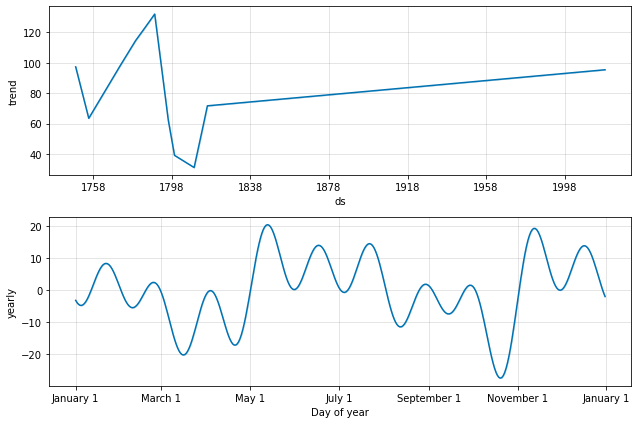

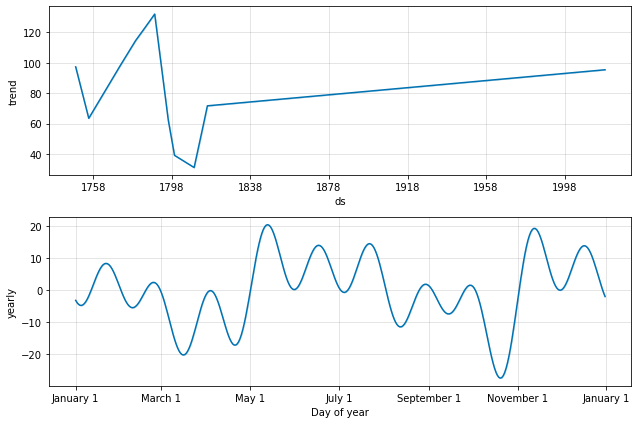

In [52]:
# plot the trend, annual seasonality and weekly seasonality of the time series
m.plot_components(forecast)

# CROSS VALIDATION FOR EVALUATING MODEL

In [53]:
from fbprophet.diagnostics import cross_validation
y_cv = cross_validation(ml, initial = '90000 days', period = '200 days', horizon = '30 days')
y_cv 

INFO:fbprophet:Making 41 forecasts with cutoffs between 1995-11-07 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-12-01,107.948602,22.163286,199.567416,14.9,1995-11-07
1,1996-06-01,107.124258,14.237534,191.069645,16.5,1996-05-25
2,1997-01-01,102.887939,22.254188,187.122468,7.4,1996-12-11
3,1997-07-01,105.881481,27.710695,193.983907,12.9,1997-06-29
4,1998-02-01,106.334226,23.741553,182.163038,50.2,1998-01-15
5,1998-09-01,105.364193,20.609454,189.811037,132.0,1998-08-03
6,1999-03-01,104.181553,23.946207,189.302660,103.5,1999-02-19
7,1999-10-01,106.338343,20.625261,190.026411,168.7,1999-09-07
8,2000-04-01,104.077677,15.048985,186.609441,191.5,2000-03-25
9,2000-11-01,103.675667,21.646199,183.767636,158.1,2000-10-11


INFO:fbprophet:Making 41 forecasts with cutoffs between 1995-11-07 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

In [14]:
from fbprophet.diagnostics import performance_metrics


yy = performance_metrics(y_cv )
yy

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-12-01,107.948602,21.589929,190.747645,14.9,1995-11-27
1,1996-07-01,107.326275,25.113473,188.175179,11.8,1996-06-24
2,1997-02-01,107.274643,21.037365,190.232273,11.0,1997-01-20
3,1997-09-01,105.935675,20.403942,192.437353,59.7,1997-08-18
4,1998-04-01,102.822166,19.509457,183.287640,70.6,1998-03-16
5,1998-11-01,99.224529,16.580860,177.971489,97.3,1998-10-12
6,1999-06-01,104.089227,21.454223,193.047415,207.2,1999-05-10
7,2000-01-01,102.143142,14.284737,184.641207,133.1,1999-12-06
8,2000-08-01,108.333902,23.523164,188.699815,180.5,2000-07-03
9,2001-02-01,107.593767,24.856659,194.289001,121.5,2001-01-29


In [47]:
# calcultae the Rsquare
R2 = r2_score(y_cv['y'], y_cv['yhat'])
R2

-0.2950469826702993

# LINEAR 6 MONTHS

In [54]:

# fitting the model 
m_6 = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
               changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml_6 = m_6.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# prediction 
future_6 = m.make_future_dataframe(periods = 6, freq = 'MS'
                                )
forecast_6 = m_6.predict(future_6)
forecast_6.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-01-01,97.320049,9.621835,178.230214,97.320049,97.320049,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,0.0,0.0,0.0,92.926615
1,1749-02-01,96.889523,14.029688,181.925494,96.889523,96.889523,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,0.0,0.0,0.0,94.838327
2,1749-03-01,96.500662,13.167464,178.607744,96.500662,96.500662,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,0.0,0.0,0.0,92.909518
3,1749-04-01,96.070136,17.595597,177.217970,96.070136,96.070136,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,0.0,0.0,0.0,95.930338
4,1749-05-01,95.653499,13.257728,182.679401,95.653499,95.653499,4.915987,4.915987,4.915987,4.915987,4.915987,4.915987,0.0,0.0,0.0,100.569486


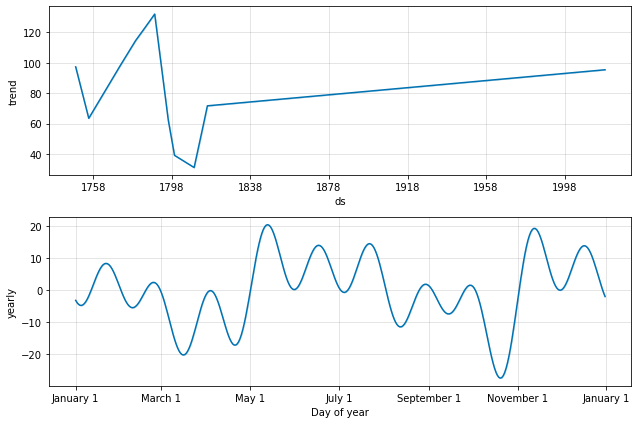

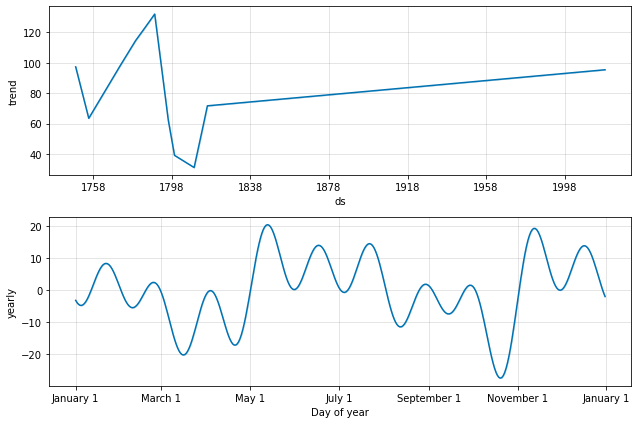

In [39]:
# plot the trend, annual seasonality and weekly seasonality of the time series

m_6.plot_components(forecast)

In [40]:
from fbprophet.diagnostics import performance_metrics


y_cv_6 = cross_validation(ml_6, initial = '90000 days', period = '200 days', horizon = '30 days')



yy_6 = performance_metrics(y_cv_6 )
yy_6

INFO:fbprophet:Making 41 forecasts with cutoffs between 1995-11-07 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

In [42]:
from fbprophet.diagnostics import performance_metrics


yy_6 = performance_metrics(y_cv_6 )
yy_6

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,4 days,4345.891522,65.923376,56.489967,0.730378,0.666667
1,7 days,5105.263313,71.451125,65.678066,0.581467,0.600000
2,8 days,4169.998010,64.575522,58.492326,0.538288,0.700000
3,10 days,2893.798310,53.794036,42.243198,0.475811,0.800000
4,11 days,1617.671682,40.220289,26.041167,0.251895,0.900000
5,12 days,2329.484696,48.264736,39.787433,0.984782,1.000000
6,16 days,7180.230147,84.736239,78.328414,1.945713,0.400000
7,17 days,6172.935452,78.568031,72.779867,1.531962,0.550000
8,20 days,3928.174007,62.675147,50.989979,0.950845,0.750000
9,21 days,5008.072709,70.767738,65.137022,0.800814,0.666667


In [56]:
# calculate Rsquare
R2 = r2_score(y_cv_6['y'], y_cv_6['yhat'])
R2

-0.2950469826702993

# LINEAR 1 MONTHS

In [43]:
# fitting the model
m_1 = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
               changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml_1 = m_1.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
# prediction

future_1 = m.make_future_dataframe(periods = 1, freq = 'MS'
                                )
forecast_1 = m_1.predict(future_1)
forecast_1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-01-01,97.320049,9.711026,174.624356,97.320049,97.320049,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,-4.393434,0.0,0.0,0.0,92.926615
1,1749-02-01,96.889523,10.163725,180.724383,96.889523,96.889523,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,-2.051197,0.0,0.0,0.0,94.838327
2,1749-03-01,96.500662,2.685055,179.061000,96.500662,96.500662,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,-3.591143,0.0,0.0,0.0,92.909518
3,1749-04-01,96.070136,7.378899,172.578162,96.070136,96.070136,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,-0.139798,0.0,0.0,0.0,95.930338
4,1749-05-01,95.653499,17.263238,185.302955,95.653499,95.653499,4.915987,4.915987,4.915987,4.915987,4.915987,4.915987,0.0,0.0,0.0,100.569486


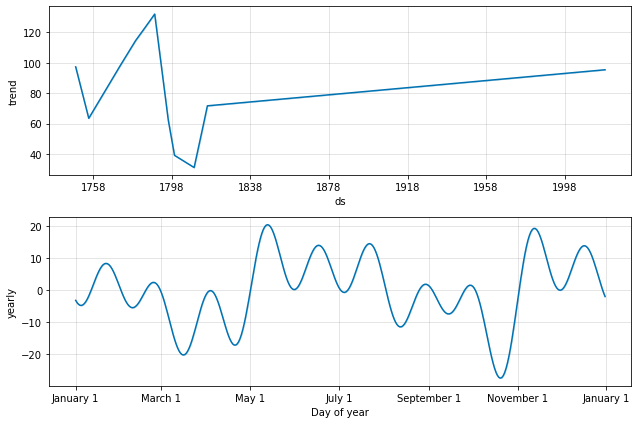

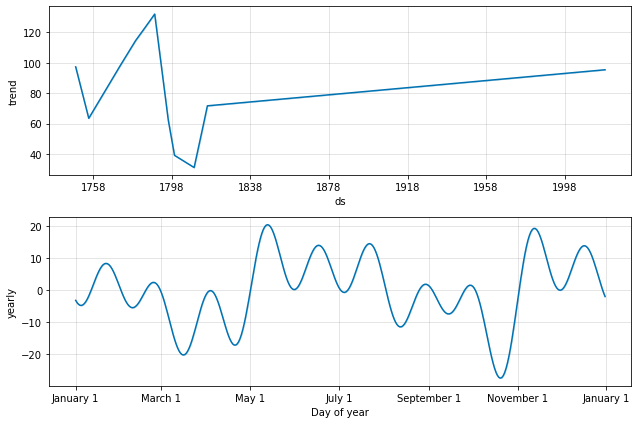

In [45]:
# plot the trend, annual seasonality and weekly seasonality of the time series
m_1.plot_components(forecast)

# CROSS VALIDATION FOR EVALUATING_MODEL

In [46]:
# cross validation
y_cv_1 = cross_validation(ml_1, initial = '90000 days', period = '200 days', horizon = '30 days')

INFO:fbprophet:Making 41 forecasts with cutoffs between 1995-11-07 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

In [55]:
# calculate rmse, mae with the cross validation

from fbprophet.diagnostics import performance_metrics
yy_1 = performance_metrics(y_cv_1)
yy_1

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,4 days,4345.891522,65.923376,56.489967,0.730378,0.666667
1,7 days,5105.263313,71.451125,65.678066,0.581467,0.400000
2,8 days,4169.998010,64.575522,58.492326,0.538288,0.550000
3,10 days,2893.798310,53.794036,42.243198,0.475811,0.700000
4,11 days,1617.671682,40.220289,26.041167,0.251895,0.850000
5,12 days,2329.484696,48.264736,39.787433,0.984782,1.000000
6,16 days,7180.230147,84.736239,78.328414,1.945713,0.400000
7,17 days,6172.935452,78.568031,72.779867,1.531962,0.550000
8,20 days,3928.174007,62.675147,50.989979,0.950845,0.750000
9,21 days,5008.072709,70.767738,65.137022,0.800814,0.666667


In [57]:
# calculate Rsquare
R2 = r2_score(y_cv_1['y'], y_cv_1['yhat'])
R2

-0.2950469826702993